<a href="https://colab.research.google.com/github/hwanggwu/CSCI6364_ML/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
data=pd.read_csv('breast-cancer-wisconsin.data')

In [25]:
data.head

<bound method NDFrame.head of      1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10   3    2    1    2
1    1015425  3   1    1    1  2   2   3    1    1    2
2    1016277  6   8    8    1  3   4   3    7    1    2
3    1017023  4   1    1    3  2   1   3    1    1    2
4    1017122  8  10   10    8  7  10   9    7    1    4
..       ... ..  ..  ...  ... ..  ..  ..  ...  ...  ...
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

[698 rows x 11 columns]>

In [26]:
data.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')
   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4
            1000025           5           1         1.1         1.2  \
count  6.980000e+02  698.000000  698.000000  698.000000  698.000000   
mean   1.071807e+06    4.416905    3.137536    3.210602    2.809456   
std    6.175323e+05    2.817673    3.052575    2.972867    2.856606   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.702582e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238354e+06    6.000000    5.000000    5.000000    4.000000   
max 

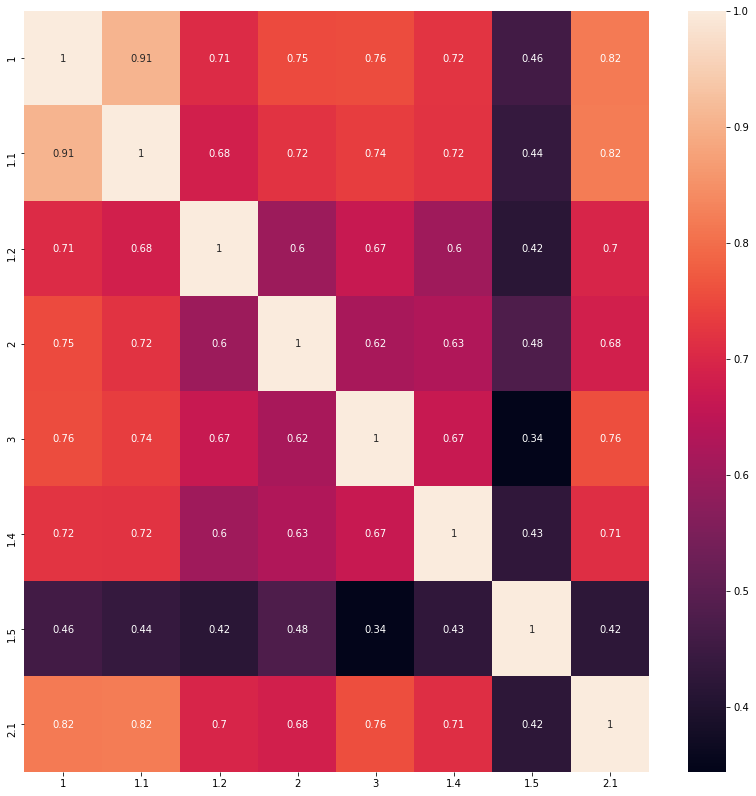

KeyError: ignored

In [12]:
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

# 将特征字段分成3组
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])

# # 数据清洗
# # ID列没有用，删除该列
# data.drop("id",axis=1,inplace=True)
# # 将B良性替换为0，M恶性替换为1
# data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

# 将肿瘤诊断结果可视化
# sns.countplot(data['diagnosis'],label="Count")
plt.show()
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()


# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_X,train_y)
# 用测试集做预测
prediction=model.predict(test_X)
print('准确率: ', metrics.accuracy_score(prediction,test_y))